In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Check if the files are present in the path
file_list = os.listdir("data")
for filename in file_list:
    print(filename)

cs-test.csv
cs-training.csv
Data Dictionary.xls
impute.p
preprocessed.csv
sampleEntry.csv


In [4]:
df = pd.read_csv("data/cs-training.csv", index_col = 0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Analysis

In [5]:
# Show null values and their proportions
null_val_sums = df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "# of Null Values": null_val_sums.values,
             "Proportion": null_val_sums.values / len(df)})

,Column,# of Null Values,Proportion
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29731,0.198207
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In [6]:
df.age.describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

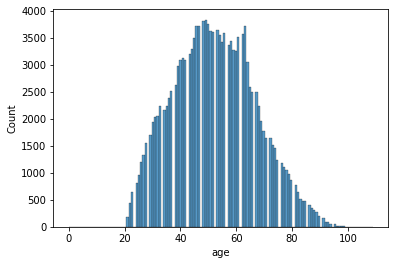

In [7]:
sns.histplot(df["age"])


<AxesSubplot:xlabel='age', ylabel='Count'>

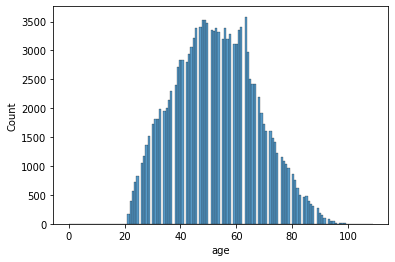

In [8]:
sns.histplot(df.loc[df["SeriousDlqin2yrs"] == 0]["age"])

<AxesSubplot:xlabel='age', ylabel='Count'>

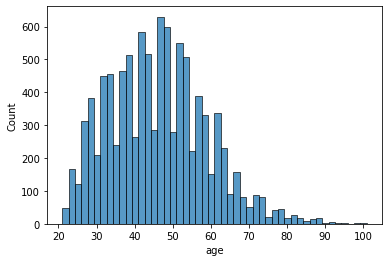

In [9]:
sns.histplot(df.loc[df["SeriousDlqin2yrs"] == 1]["age"])

In [10]:
print(df["SeriousDlqin2yrs"].value_counts())

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64


Proportion of people who defaulted: 0.06684


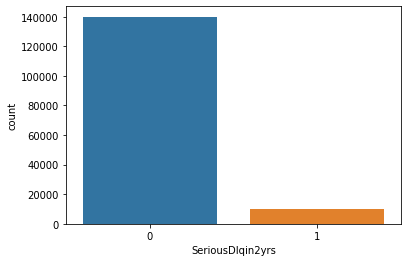

In [11]:
sns.countplot(x="SeriousDlqin2yrs", data=df)
print(f"Proportion of people who defaulted: {df['SeriousDlqin2yrs'].sum() / len(df)}")

In [12]:
df["RevolvingUtilizationOfUnsecuredLines"].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Text(0.5, 1.0, 'Proportion of Defaulters As Minimum RUUL Increases')

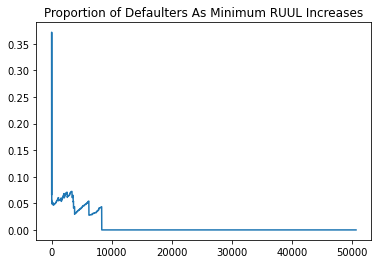

In [13]:
default_prop = []
for i in range(int(df["RevolvingUtilizationOfUnsecuredLines"].max())):
    temp_ = df.loc[df["RevolvingUtilizationOfUnsecuredLines"] >= i]
    default_prop.append([i, temp_["SeriousDlqin2yrs"].mean()])
    
sns.lineplot(x=[i[0] for i in default_prop], y=[i[1] for i in default_prop])
plt.title("Proportion of Defaulters As Minimum RUUL Increases")

In [14]:
# Find the proportion of defaulters whose debt does not exceed total credit limit.
defaulter = df.loc[df["RevolvingUtilizationOfUnsecuredLines"] <= 1]["SeriousDlqin2yrs"].mean()
print(f"Proportion of those under the credit limit: {defaulter}")
defaulter_13 = df.loc[df["RevolvingUtilizationOfUnsecuredLines"] <= 13]["SeriousDlqin2yrs"].mean()
print(f"Proportion of those who are under the credit limit or exceeds up to 13 times credit limit: {defaulter_13}")



Proportion of those under the credit limit: 0.05991996127598361
Proportion of those who are under the credit limit or exceeds up to 13 times credit limit: 0.06685273968029273


#### Late Payments

In [15]:
print(df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index())
print(df["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index())
print(df["NumberOfTimes90DaysLate"].value_counts().sort_index())

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64


In [16]:
late_columns = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTime30-59DaysPastDueNotWorse"]
df.loc[df["NumberOfTimes90DaysLate"] > 17][late_columns].describe()

,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse
count,269.000000,269.000000,269.000000
mean,97.962825,97.962825,97.962825
std,0.270628,0.270628,0.270628
min,96.000000,96.000000,96.000000
25%,98.000000,98.000000,98.000000
50%,98.000000,98.000000,98.000000
75%,98.000000,98.000000,98.000000
max,98.000000,98.000000,98.000000


#### Debt Ratio

In [17]:
df["DebtRatio"].describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

In [35]:
df["DebtRatio"].quantile(0.95)

2449.0

In [30]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.95)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,7494.000000,379.000000,7494.000000
mean,4417.958367,0.084433,0.055111
std,7875.314649,0.278403,0.228212
min,2450.000000,0.000000,0.000000
25%,2893.250000,0.000000,0.000000
50%,3491.000000,0.000000,0.000000
75%,4620.000000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [31]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.95)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

331

In [34]:
df["DebtRatio"].quantile(0.975)

3489.024999999994

In [32]:
df.loc[df["DebtRatio"] > df["DebtRatio"].quantile(0.975)][["DebtRatio", "MonthlyIncome", "SeriousDlqin2yrs"]].describe()

,DebtRatio,MonthlyIncome,SeriousDlqin2yrs
count,3750.000000,185.000000,3750.000000
mean,5917.488000,0.064865,0.064267
std,10925.524011,0.246956,0.245260
min,3490.000000,0.000000,0.000000
25%,3957.250000,0.000000,0.000000
50%,4619.000000,0.000000,0.000000
75%,5789.500000,0.000000,0.000000
max,329664.000000,1.000000,1.000000


In [33]:
len(df[(df["DebtRatio"] > df["DebtRatio"].quantile(0.975)) & (df['SeriousDlqin2yrs'] == df['MonthlyIncome'])])

164

#### Monthly Income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

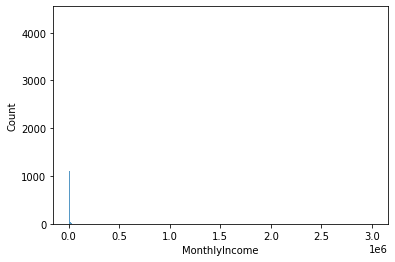

In [18]:
sns.histplot(df["MonthlyIncome"].dropna())

In [19]:
df["MonthlyIncome"].dropna().describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

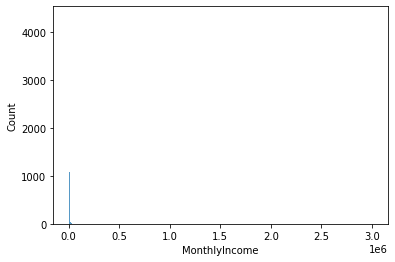

In [21]:
sns.histplot(df.loc[df["DebtRatio"] <= df["DebtRatio"].quantile(0.975)]["MonthlyIncome"].dropna())

#### NumberOfOpenCreditLinesAndLoans

In [22]:
df["NumberOfOpenCreditLinesAndLoans"].describe()

count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [23]:
df["NumberOfOpenCreditLinesAndLoans"].value_counts()

6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
43        8
45        8
37        7
48        6
49        4
41        4
54        4
46        3
52        3
57        2
56        2
44        2
51        2
50        2
47        2
53        1
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

<AxesSubplot:xlabel='NumberOfOpenCreditLinesAndLoans', ylabel='Count'>

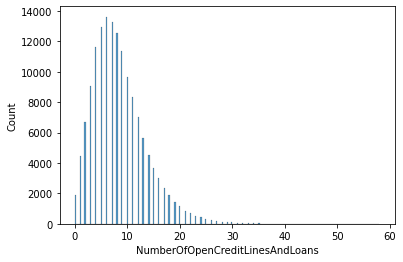

In [25]:
sns.histplot(df["NumberOfOpenCreditLinesAndLoans"])

#### NumberRealEstateLoansOrLines

In [26]:
df["NumberRealEstateLoansOrLines"].describe()

count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [27]:
df["NumberRealEstateLoansOrLines"].value_counts()

0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
15        7
14        7
16        4
17        4
25        3
18        2
19        2
20        2
23        2
21        1
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

<AxesSubplot:xlabel='NumberRealEstateLoansOrLines', ylabel='count'>

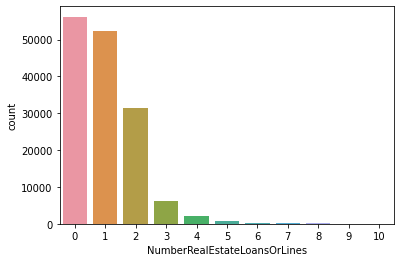

In [28]:
sns.countplot(x="NumberRealEstateLoansOrLines", data=df.loc[df["NumberRealEstateLoansOrLines"] <= 10])

In [29]:
df.loc[df["NumberRealEstateLoansOrLines"] > 13]["SeriousDlqin2yrs"].describe()

count    38.000000
mean      0.210526
std       0.413155
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: SeriousDlqin2yrs, dtype: float64

#### Number of Dependents

In [19]:
df["NumberOfDependents"].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [20]:
df["NumberOfDependents"].value_counts()

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64

<AxesSubplot:xlabel='NumberOfDependents', ylabel='count'>

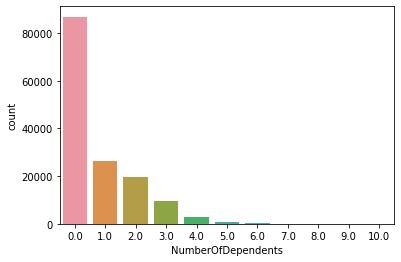

In [21]:
sns.countplot(x="NumberOfDependents", data=df.loc[df["NumberOfDependents"] <= 10])

### Results

- Remove samples with values of DebtRatio above its 97.5 percentile
- RevolvingUtilizationOfUnsecuredLines < 13
- Set NumberOfTimes90DaysLate <= 17
- Impute MonthlyIncome with its median
- Impute NumberOfDependents with its mode